# Preprocessing:::-------------------------------------------------------------------------------------

In [82]:
from sklearn import preprocessing

# Scaling the values

In [83]:
import numpy as np

In [84]:
arr = np.array([[1.,1.,2.],
               [2.,0.,0.],
               [0.,1.,-1.]])
arr

array([[ 1.,  1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [85]:
# This is the process how scaling is been done:

x_scaled = preprocessing.scale(arr)
x_scaled

array([[ 0.        ,  0.70710678,  1.33630621],
       [ 1.22474487, -1.41421356, -0.26726124],
       [-1.22474487,  0.70710678, -1.06904497]])

In [86]:
x_scaled.mean(axis=0)

array([0.00000000e+00, 7.40148683e-17, 0.00000000e+00])

In [87]:
x_scaled.std(axis=0)

array([1., 1., 1.])

# Min-Max Scaling

#### For Example:::

In [88]:
arr_1 = np.array([[15.,-1.,2.],
                 [2.,0.,0.],
                 [0.,1.,-44.]])
arr_1

array([[ 15.,  -1.,   2.],
       [  2.,   0.,   0.],
       [  0.,   1., -44.]])

In [89]:
min_max_scaled = preprocessing.MinMaxScaler()   # function 1st used
arr_1_minmax = min_max_scaled.fit_transform(arr_1)  #function 2nd used
arr_1_minmax

array([[1.        , 0.        , 1.        ],
       [0.13333333, 0.5       , 0.95652174],
       [0.        , 1.        , 0.        ]])

# Normalization

It is a process of converting a scaled value into unit vector.

In [90]:
X = [[1.,-1.,2.],
     [2.,0.,0.],
     [0.,1.,-1.]]

In [91]:
x_normalized = preprocessing.normalize(X, norm ='l2')
x_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# Encoding categorical values/features

In [92]:
enc = preprocessing.OrdinalEncoder()
Y = [['male','Asansol','7'],['female','Kolkata','5']]
enc.fit(Y)

OrdinalEncoder()

In [93]:
enc.transform([['female','Kolkata','5']])

array([[0., 1., 0.]])

In [94]:
enc.transform([['male','Asansol','7']])

array([[1., 0., 1.]])

# One Hot Encoding

In [95]:
from sklearn.feature_extraction import DictVectorizer

In [96]:
ohe = DictVectorizer()

x = [{'city': 'London'},
     {'city': 'Paris'},
     {'city': 'New York'}
    ]

In [97]:
ohe.fit_transform(x).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Handling The Missing Values::---------------------------(imp)---------------------------------

In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.DataFrame([['a','x'],
                  [np.nan,'y'],
                  ['a',np.nan],
                  ['b','y']])
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [100]:
# Calling the class 'impute':

from sklearn.impute import SimpleImputer

# Defining the parameters:

p = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [101]:
p.fit_transform(df)

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# SIMPLE LINEAR REGRESSION:::---------------------------------------------------------------

In [103]:
# Importing the Dataset:

data = pd.read_excel('Pro.xlsx')
data

,x,y
0,5,99
1,7,86
2,8,87
3,7,88
4,2,111
5,17,86
6,2,103
7,9,87
8,4,94
9,11,78


In [104]:
# Provided location for each integer values to specific indexes:

X=data.iloc[:,:1].values
Y=data.iloc[:,1].values

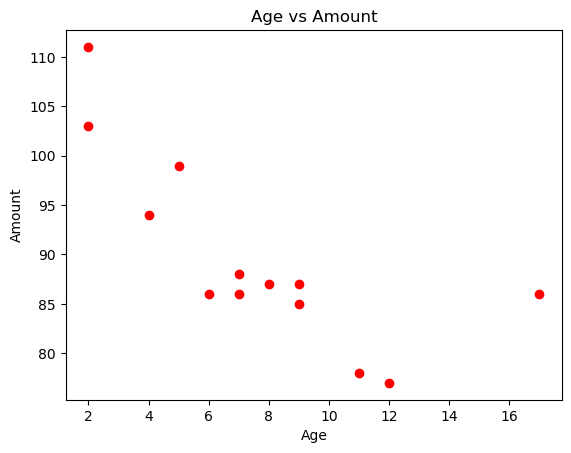

In [105]:
plt.scatter(X,Y,color = 'red')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

#### Splitting the Data set into 'TRAINING AND TEST SET'

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/5, random_state=0)

#### Fitting Simple linear regression to the Training Set and printing the coefficient values:

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
r = LinearRegression()
r.fit(X_train,Y_train)
print('Intercept (b0) = %.2f' %r.intercept_)
print('b1 = %.2f' %r.coef_)

Intercept (b0) = 94.38
b1 = -0.76


#### Predicting the Test Set 

In [110]:
y_prediction = r.predict(X_test)

### Printing the error of prediction

using mean squared error method:

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
print('Mean Squared Error: %.2f' % mean_squared_error(Y_test,y_prediction))

Mean Squared Error: 65.68


### Visualizing the Training Set Results: 

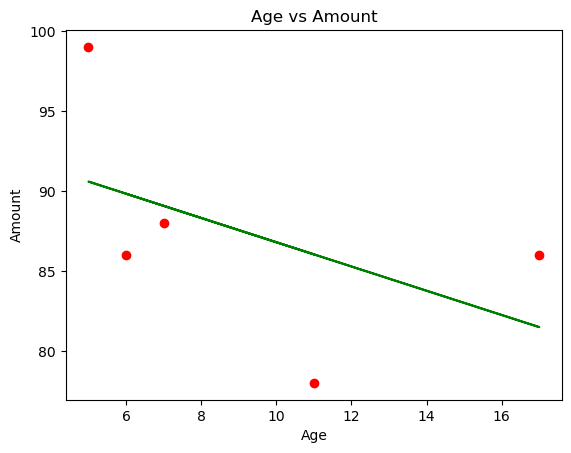

In [113]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,r.predict(X_train),color='green')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

### Visualizing the Test Set Results: 

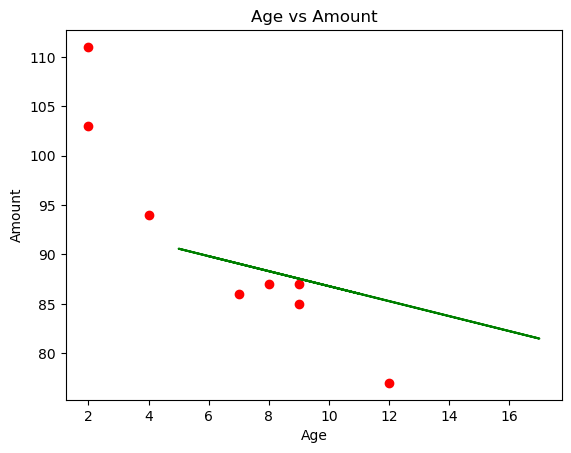

In [114]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_train,r.predict(X_train),color='green')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

# Model Evaluation:::------------------------------------------------------------------------ 

In [115]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
x = df.iloc[:,1:5].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:
y = df.iloc[:,5]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [118]:
# So now we have the change the string type of 'y' into numbers::

from sklearn.preprocessing import LabelEncoder

y_convert = LabelEncoder()

y = y_convert.fit_transform(y)

In [119]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

 Calling the logistic regression and fitting the model

# (i) Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [122]:
# Now predicting the y:

y_prediction = lr.predict(x_test)

In [123]:
y_prediction

array([1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 1, 0, 2])

In [124]:
y_test

array([1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 1, 0, 1])

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [126]:
# Calculating the accuracy:
29/30

0.9666666666666667

# (ii) KNeighbors Classification

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [128]:
y_prediction = knn.predict(x_test)

In [129]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [130]:
# Calculating the accuracy:
29/30

0.9666666666666667

# (iii) Naive_Bayes (GaussianNB) 

In [131]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [132]:
y_prediction = nb.predict(x_test)

In [133]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [134]:
# Calculating the accuracy:
30/30

1.0

# (iv) SVM algorithm 

(a) kernal='sigmoid'

In [135]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid')

svc.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [136]:
y_prediction = svc.predict(x_test)

In [137]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [11,  0,  0],
       [12,  0,  0]], dtype=int64)

In [138]:
# Calculating the accuracy:
8/30

0.26666666666666666

(b) kernal='linear'

In [139]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [140]:
y_prediction = svc.predict(x_test)

In [141]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [142]:
# Calculating the accuracy:
29/30

0.9666666666666667

(c) kernel='radial'

In [143]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [144]:
y_prediction = svc.predict(x_test)

In [145]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [146]:
# Calculating the accuracy:
29/30

0.9666666666666667

(d) kernel='poly' ## Polynomial

In [147]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [148]:
y_prediction = svc.predict(x_test)

In [149]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [150]:
# Calculating the accuracy:
29/30

0.9666666666666667

# (v) Decision Tree algorithm

In [151]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy')
t.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [152]:
y_prediction = t.predict(x_test)

In [153]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  8,  3],
       [ 0,  0, 12]], dtype=int64)

In [154]:
# Calculating the accuracy:
29/30

0.9666666666666667

# (vi) Random Forest Algorithm

In [155]:
from sklearn.ensemble import RandomForestClassifier
f = RandomForestClassifier(n_estimators=3, criterion='entropy')
f.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [156]:
y_prediction = f.predict(x_test)

In [157]:
confusion_matrix(y_test,y_prediction)

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

In [158]:
# Calculating the accuracy:
29/30

0.9666666666666667

{ LIKE THIS WE PREDICT,RUN AND USE A MODEL }

# --------------------------------------------------------------------------------------------------------------